# NEW MOVIE STUDIO

Authors:
1. Grace Gitau
2. Zachariah Komu
3. Peter Mbuthia
4. Paullet Ndeda

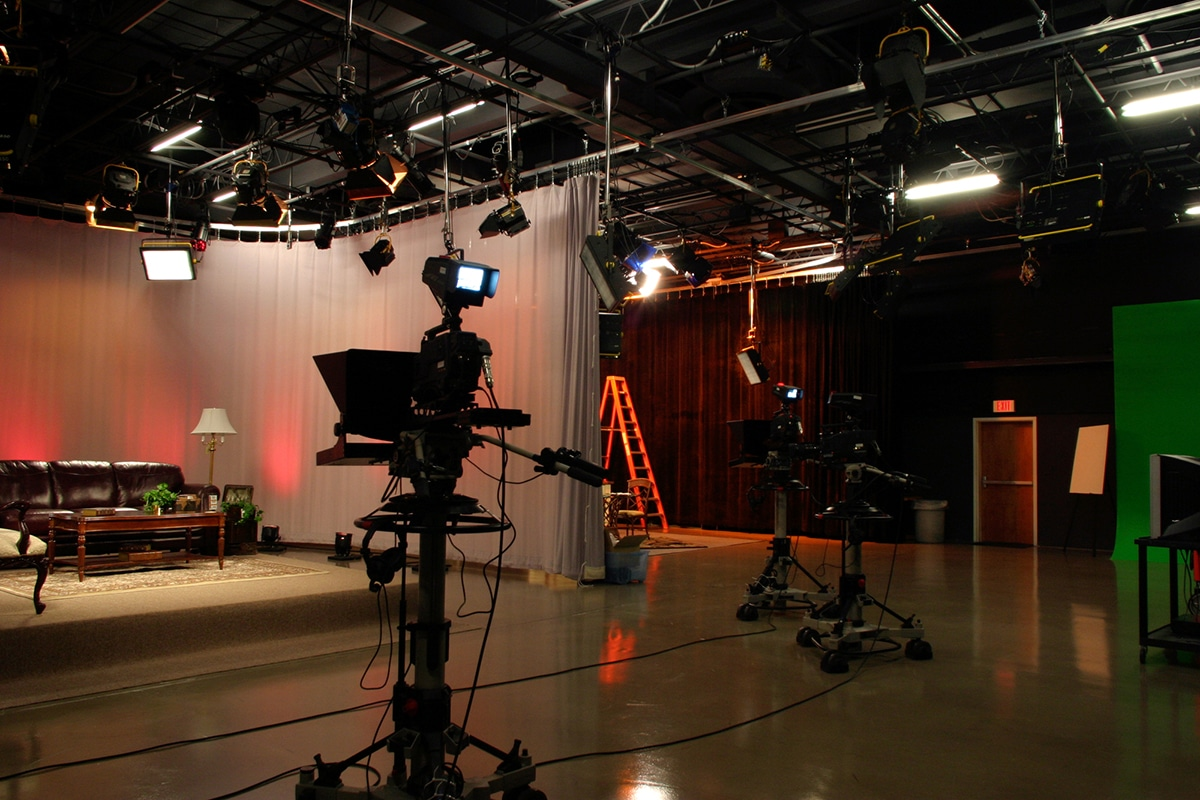

## Overview
Your company is venturing into the movie industry by creating a new movie studio. With the rise of original content creation by major companies, there's an opportunity to tap into this lucrative market. However, your company lacks the necessary insights and expertise in filmmaking. Your task is to analyze current trends in the movie industry, focusing on what type of films are performing best at the box office, and translate these findings into actionable insights for the company's new movie studio.

## Business Problem
Your company now sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with exploring what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

**Stakeholder**: Head of the company's new movie studio

## Data Understanding
In the folder *Data* are movie datasets from:

- Box Office Mojo
- IMDB
- Rotten Tomatoes
- TheMovieDB.org


Below is a summary of the typical columns you might find in a movie dataset used for analyzing the correlation between movie popularity and average scores:

1. **Movie Title**: The title of the movie.
2. **Release Year**: The year the movie was released.
3. **Genre**: The genre(s) of the movie (e.g., Action, Comedy, Drama).
4. **Director**: The name of the director(s).
5. **Cast**: The main cast members.
6. **Budget**: The production budget of the movie.
7. **Box Office Gross**: The total revenue generated by the movie.
8. **Average Score**: The average rating given by critics or audiences.
9. **Number of Reviews**: The total number of reviews received.
10. **Popularity**: A metric indicating the popularity of the movie, which could be based on factors like box office performance, number of viewers, or social media mentions.
11. **Runtime**: The duration of the movie in minutes.
12. **Language**: The primary language of the movie.
13. **Country**: The country where the movie was produced.
14. **Production Company**: The company that produced the movie.
15. **Release Date**: The specific date when the movie was released.
16. **Awards**: Any awards won by the movie.
17. **Rating Certificate**: The movie's certification rating (e.g., PG, R).
18. **Synopsis**: A brief summary of the movie's plot.

These columns provide a comprehensive view of various aspects of a movie, from basic details like title and genre to financial information such as budget and box office gross, as well as popularity indicators and critical reception.

## Questions to consider
1. What is the best season to release movies vs popularity & domestic gross?
2. What is the most successful genre?
3. Is there a relationship of runtime of movies vs domestic gross and production budget?
4. What are the leading movie studios and production budgets?
5. Can the film industry be a consistent profit center?
6. What is the correlation between vote average and popularity?

## Step 1: Importing packages and loading data

In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis using dataframes
import numpy as np  # For numerical operations and array manipulation
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations in Python
import seaborn as sns  # For making statistical graphics in Python (built on top of matplotlib)

import zipfile  # For unzipping compressed files
import sqlite3  # For connecting to and querying SQLite databases

%matplotlib inline

In [2]:
#Load the CSV files
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t', encoding='unicode_escape')
reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='unicode_escape')

In [3]:
#Unzip and load the SQLite Database
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as z:
    z.extractall()
    
conn = sqlite3.connect('im.db')
cursor = conn.cursor()

table_names = pd.read_sql("SELECT name FROM sqlite_master WHERE type = 'table';", conn)
print(table_names)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [4]:
#Load the relevant tables from the database
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

conn.close()

## Step 2: Merge Data Sources

In [5]:
# Merging relevant tables from the sqlite database (movie basics and movie ratings)
movie_basics_and_ratings  = movie_basics.merge(movie_ratings, on = 'movie_id')

# Display the merged data
print(movie_basics_and_ratings.head())

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  averagerating  numvotes  
0        2013            175.0    Action,Crime,Drama            7.0        77  
1        2019            114.0       Biography,Drama            7.2        43  
2        2018            122.0                 Drama            6.9      4517  
3        2018              NaN          Comedy,Drama            6.1        13  
4        2017             80.0  Comedy,Drama,Fantasy            6.5       119  


## Step 3: Data Cleaning

### Cleaning movie_basics_and_ratings dataframe

In [6]:
# Rename columns for readability
movie_basics_and_ratings.rename(columns={
    'primary_title': 'Title', 'runtime_minutes': 'Runtime',
    'genres': 'Genres', 'average_rating': 'AverageRating',
    'num_votes': 'NumVotes'}, inplace=True)

# Drop the original_title column as it is not needed
movie_basics_and_ratings.drop(columns=['original_title'], inplace=True)

# Handle missing values in runtime_minutes by filling them with the mean runtime
movie_basics_and_ratings['Runtime'].fillna(movie_basics_and_ratings['Runtime'].mean(), inplace=True)

# Fill missing values in Genres with 'unknown'
movie_basics_and_ratings['Genres'].fillna('unknown', inplace=True)

# Display the cleaned dataframe
print(movie_basics_and_ratings.head())

    movie_id                            Title  start_year    Runtime  \
0  tt0063540                        Sunghursh        2013  175.00000   
1  tt0066787  One Day Before the Rainy Season        2019  114.00000   
2  tt0069049       The Other Side of the Wind        2018  122.00000   
3  tt0069204                  Sabse Bada Sukh        2018   94.65404   
4  tt0100275         The Wandering Soap Opera        2017   80.00000   

                 Genres  averagerating  numvotes  
0    Action,Crime,Drama            7.0        77  
1       Biography,Drama            7.2        43  
2                 Drama            6.9      4517  
3          Comedy,Drama            6.1        13  
4  Comedy,Drama,Fantasy            6.5       119  


### Cleaning movie_gross dataframe

In [7]:
# Handle missing values
movie_gross.dropna(inplace=True)

# Dropping all rows where the domestic gross, foreign gross and studio is null
movie_gross = movie_gross.dropna(subset=['domestic_gross', 'foreign_gross', 'studio'])

# Rename columns for readability
movie_gross.rename(columns={'title': 'Movie_Title', 'domestic_gross': 'Domestic_Gross',
    'foreign_gross': 'Foreign_Gross', 'studio': 'Studio' }, inplace=True)

# Remove any commas in the Foreign_Gross column and convert to float
movie_gross['Foreign_Gross'] = movie_gross['Foreign_Gross'].str.replace(',', '').astype(float)

movie_gross.head()

,Movie_Title,Studio,Domestic_Gross,Foreign_Gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


### Cleaning tmdb_movies dataframe

In [8]:
# Drop the Unnamed: 0 column as it is not needed
tmdb_movies = tmdb_movies.drop(columns=['Unnamed: 0'])

# Convert release_date to datetime format
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'], errors='coerce')

# Extract day, month, and year from release_date
tmdb_movies['release_day'] = tmdb_movies['release_date'].dt.day
tmdb_movies['release_month'] = tmdb_movies['release_date'].dt.month
tmdb_movies['release_year'] = tmdb_movies['release_date'].dt.year

# Drop the release_date and original_title columns as they are not needed
tmdb_movies = tmdb_movies.drop(columns=['release_date', 'original_title', 'release_day'])

tmdb_movies.rename(columns={'title': 'Movie_Title'}, inplace = True)

# Display the first few rows to check the result
tmdb_movies.head()

,genre_ids,id,original_language,popularity,Movie_Title,vote_average,vote_count,release_month,release_year
0,"[12, 14, 10751]",12444,en,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11,2010
1,"[14, 12, 16, 10751]",10191,en,28.734,How to Train Your Dragon,7.7,7610,3,2010
2,"[12, 28, 878]",10138,en,28.515,Iron Man 2,6.8,12368,5,2010
3,"[16, 35, 10751]",862,en,28.005,Toy Story,7.9,10174,11,1995
4,"[28, 878, 12]",27205,en,27.920,Inception,8.3,22186,7,2010


### Cleaning movie_budgets dataframe

In [9]:
# Drop the id column as it is not needed
movie_budgets = movie_budgets.drop(columns=['id'])

# Convert release_date to datetime format
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'], errors='coerce')

# Drop rows where release_date could not be converted
movie_budgets.dropna(subset=['release_date'], inplace=True)

# Extract day, month, and year from release_date
movie_budgets['release_day'] = movie_budgets['release_date'].dt.day
movie_budgets['release_month'] = movie_budgets['release_date'].dt.month
movie_budgets['release_year'] = movie_budgets['release_date'].dt.year

# Drop the release_date column as it is not needed
movie_budgets = movie_budgets.drop(columns=['release_date', 'release_day'])

# Remove any commas and dollar signs in the budget and gross columns and convert to float
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('[\$,]', '', regex=True).astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('[\$,]', '', regex=True).astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('[\$,]', '', regex=True).astype(float)

# Rename columns for readability
movie_budgets.rename(columns={
    'movie': 'Movie_Title',
    'production_budget': 'ProductionBudget',
    'domestic_gross': 'DomesticGross',
    'worldwide_gross': 'WorldwideGross'
}, inplace=True)

# Display the first few rows to check the result
movie_budgets.head()

,Movie_Title,ProductionBudget,DomesticGross,WorldwideGross,release_month,release_year
0,Avatar,425000000.0,760507625.0,2.776345e+09,12,2009
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,2017


### Cleaning movie_info dataframe

In [10]:
# Handle missing values
movie_info.fillna({'rating': 'unknown',
    'genre': 'unknown',
    'director': 'unknown',
    'writer': 'unknown',
    'studio': 'unknown',
    'currency': '$' }, inplace=True)

# Drop rows where runtime is null
movie_info.dropna(subset=['runtime'], inplace=True)

# Drop unnecessary columns
movie_info = movie_info.drop(columns=['synopsis', 'theater_date', 'dvd_date'])

# Remove any commas and dollar signs in the box_office column and convert to float
movie_info['box_office'] = movie_info['box_office'].str.replace('[\$,]', '', regex=True).astype(float)

# Rename columns for readability
movie_budgets.rename(columns={'runtime': 'runtime_minutes'}, inplace=True)

# Fill null values in box_office with 0
movie_info['box_office'].fillna(0, inplace=True)

# Reset the index to ensure it follows a sequential order
movie_info.reset_index(drop=True, inplace=True)

# Display the first few rows to check the result
movie_info.head()

,id,rating,genre,director,writer,currency,box_office,runtime,studio
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,$,0.0,104 minutes,unknown
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,$,600000.0,108 minutes,Entertainment One
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,$,0.0,116 minutes,unknown
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,$,0.0,128 minutes,unknown
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,$,0.0,200 minutes,unknown


## Step 4: EDA

### 1.What is the best season to release movies vs popularity/domestic gross?


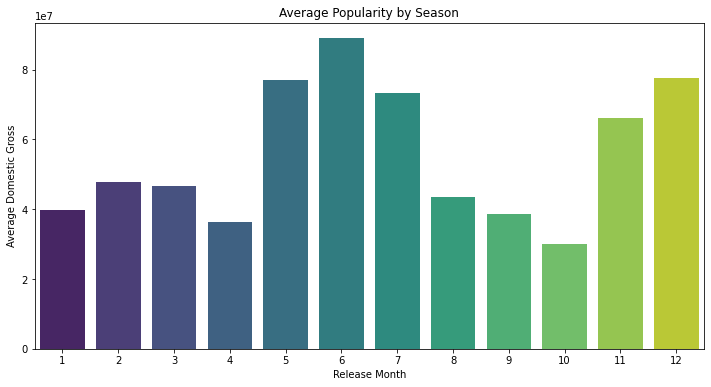

In [11]:
# Merge movie_gross with tmdb_movies on Movie_Title
merged_movies = movie_gross.merge(tmdb_movies, on='Movie_Title')

# Aggregate data to find average Domestic_Gross by release month
avg_domestic_gross_by_month = merged_movies.groupby('release_month')['Domestic_Gross'].mean().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='release_month', y='Domestic_Gross', data=avg_domestic_gross_by_month, palette='viridis')
plt.title('Average Popularity by Season')
plt.xlabel('Release Month')
plt.ylabel('Average Domestic Gross')
plt.show()

Optimal Release Timing: Movies released during the summer (June to August) and winter holiday seasons (November to December) tend to perform better in terms of domestic gross.

### 2. What is the most successful genre?


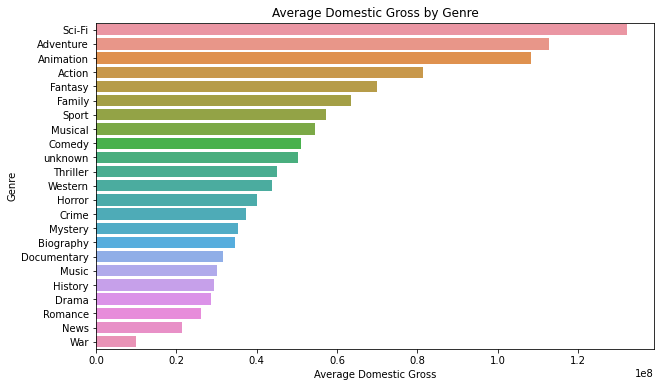

In [12]:
# Extract genres from movie_basics_and_ratings
genres_data = movie_basics_and_ratings['Genres'].str.split(',', expand = True).stack().reset_index(level=1, drop=True)
genres_data.name = 'Genre'

# Merge genres with movie_gross
merged_genres = movie_basics_and_ratings[['Title', 'Genres']].merge(movie_gross, left_on = 'Title', right_on='Movie_Title')

# Explode genres to separate rows
merged_genres = merged_genres.assign(Genres = merged_genres['Genres'].str.split(',')).explode('Genres')

# Calculate average Domestic_Gross per Genre
avg_domestic_gross_by_genre = merged_genres.groupby('Genres')['Domestic_Gross'].mean().reset_index()

# Plot the results
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Domestic_Gross', y = 'Genres', data = avg_domestic_gross_by_genre.sort_values(by = 'Domestic_Gross', ascending=False))
plt.title('Average Domestic Gross by Genre')
plt.xlabel('Average Domestic Gross')
plt.ylabel('Genre')
plt.show()

Interpretation:

The chart above demonstrates that the Scifi genre movies perform the best with regards average domestic gross earnings. Therefore, as a movie studio, it is recommendable to invest in creating movies in genres such as Scifi, Adventure and Action, in order to get good returns in terms of average domestic gross.

### 3. Is there a relationship of runtime of movies vs domestic gross, worldwide gross and production budget?


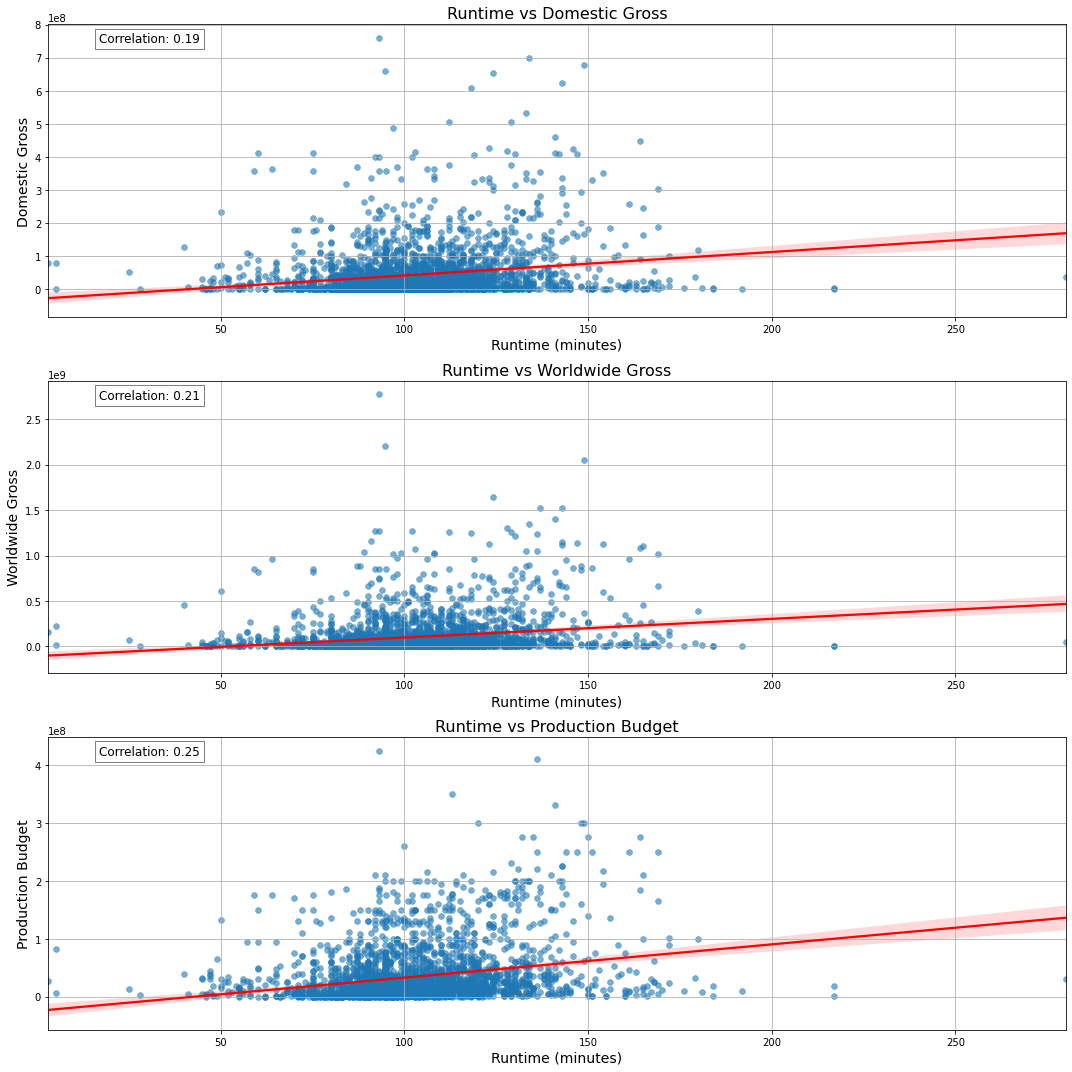

In [13]:
# Merge movie_budgets with movie_basics_and_ratings
merged_budgets_runtime = movie_budgets.merge(movie_basics_and_ratings[['Title', 'Runtime']], left_on='Movie_Title', right_on='Title')

# Define the variables to plot
plot_vars = [
    ('DomesticGross', 'Domestic Gross'),
    ('WorldwideGross', 'Worldwide Gross'),
    ('ProductionBudget', 'Production Budget')
]

# Create scatter plots
plt.figure(figsize=(15, 15))

for i, (y_var, y_label) in enumerate(plot_vars, start=1):
    plt.subplot(3, 1, i)
    sns.scatterplot(x='Runtime', y=y_var, data=merged_budgets_runtime, alpha=0.6, edgecolor=None)
    sns.regplot(x='Runtime', y=y_var, data=merged_budgets_runtime, scatter=False, color='red')
    plt.title(f'Runtime vs {y_label}', fontsize=16)
    plt.xlabel('Runtime (minutes)', fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.grid(True)

    # Compute and annotate correlation
    correlation = merged_budgets_runtime[['Runtime', y_var]].corr().iloc[0, 1]
    plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()




### Interpretation:

- **Middle Concentration**: Data points clustering around the trendline's middle indicate that most movies have average runtimes and budgets, resulting in moderate gross revenues.
- **Trendline Analysis**: The trendline shows the overall trend, with fewer deviations from the average.
- **Correlation Coefficient**: The annotated correlation value indicates the relationship's strength and direction. A weak correlation suggests runtime alone is not a strong predictor of gross revenue or budget.

### Simplified Insights:

1. **Average Movies**:
   - Most movies have runtimes and budgets close to the industry average, leading to average revenues.

2. **Market Trends**:
   - Movies tend to follow common industry standards for length and budget, aiming for predictability and profitability.

3. **Risk Management**:
   - Producers avoid movies with extreme runtimes or budgets to reduce risk and ensure more predictable returns.

4. **Consumer Preferences**:
   - People generally prefer movies of average length and budget, which helps these movies perform consistently well at the box office.

5. **Further Analysis**:
   - Investigate movies that deviate from the average to understand their success or failure. Explore if non-standard trends exist.

### 4. What are the leading movie studios and production budgets?


In [14]:
# Create a new column in movie_budgets called 'Studio' and assign the values from movie_info['Studio']
movie_budgets ["studio"] = movie_info ["studio"]

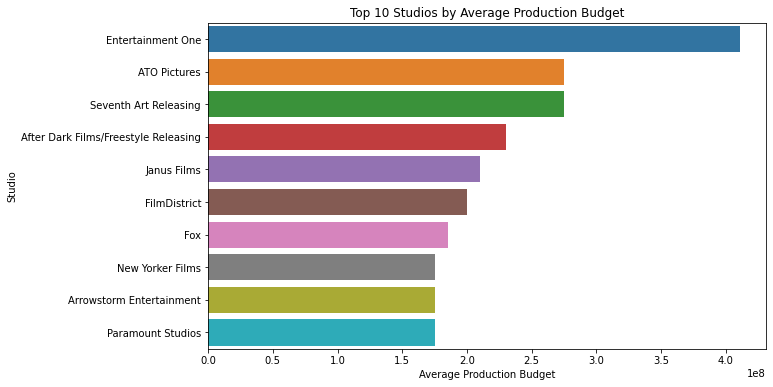

In [15]:
# Calculate average production budget per studio
avg_budget_by_studio = movie_budgets.groupby('studio')['ProductionBudget'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductionBudget', y='studio', data=avg_budget_by_studio.sort_values(by='ProductionBudget', ascending=False).head(10))
plt.title('Top 10 Studios by Average Production Budget')
plt.xlabel('Average Production Budget')
plt.ylabel('Studio')
plt.show()

### 5. Profitability Analysis
To evaluate whether the film industry has become more or less profitable, and if higher spending on production affects profitability:

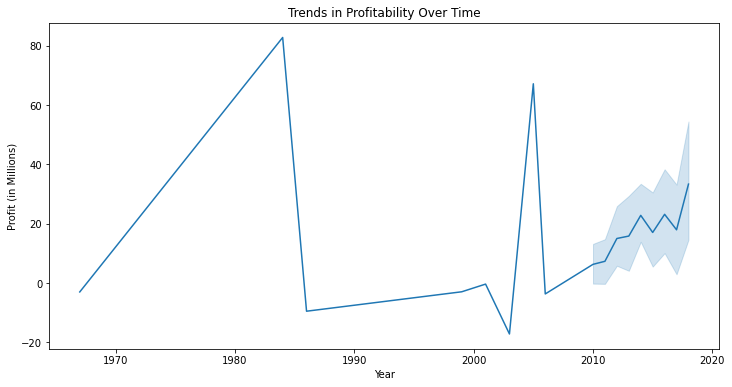

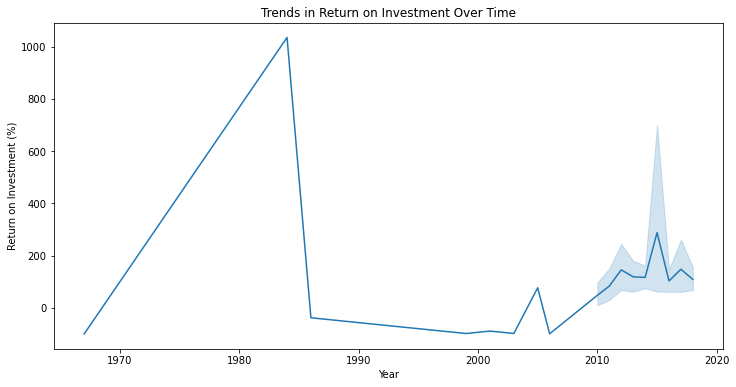

In [16]:
# Combine movie_budgets and movie_gross
combined_df = movie_budgets.merge(movie_gross, on='Movie_Title')

# Add profitability metrics
combined_df['Profit_Millions'] = (combined_df['DomesticGross'] - combined_df['ProductionBudget']) / 1e6
combined_df['ROI'] = ((combined_df['DomesticGross'] - combined_df['ProductionBudget']) / combined_df['ProductionBudget']) * 100

# Plot trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='Profit_Millions', data=combined_df)
plt.title('Trends in Profitability Over Time')
plt.xlabel('Year')
plt.ylabel('Profit (in Millions)')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='ROI', data=combined_df)
plt.title('Trends in Return on Investment Over Time')
plt.xlabel('Year')
plt.ylabel('Return on Investment (%)')
plt.show()

Interpretation:

The plot above indicates that the movie industry has been profitable over the years with an upwaards spike in the 1980s and drastic fall towards 1990, both domestically and beyond. These changes can be explained as follows; Due to the success of blockbuster movies like *E.T.* and *Jurassic Park*, the surge in home video sales and rentals, and advances in special effects, the US film industry enjoyed a boost in revenue in the 1980s. Sources: [Box Office Mojo] (https://www.boxofficemojo.com), [Variety] (https://variety.com).

Revenues declined in the 1990s as a result of audience preferences shifting, economic downturns, growing production costs, and heightened competition from other media. Sources: [IMDb] (https://www.imdb.com), [The Hollywood Reporter] (https://www.hollywoodreporter.com).



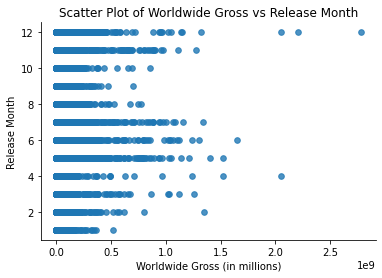

In [17]:
# @title WorldwideGross vs release_month

# Create the scatter plot
movie_budgets.plot(kind='scatter', x='WorldwideGross', y='release_month', s=32, alpha=.8)

# Hide the top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot with proper labels and title
plt.xlabel('Worldwide Gross (in millions)')
plt.ylabel('Release Month')
plt.title('Scatter Plot of Worldwide Gross vs Release Month')
plt.show()


Interpretation:

Movies released in the month of December gross higher than those released in other months. According to the plot above, movies released in the former period generate values of over 2.5 million dollars globally, whilst those released earlier in year, barely cross the 1.5 million mark.

### 6. Correlation Between Popularity and Vote Average

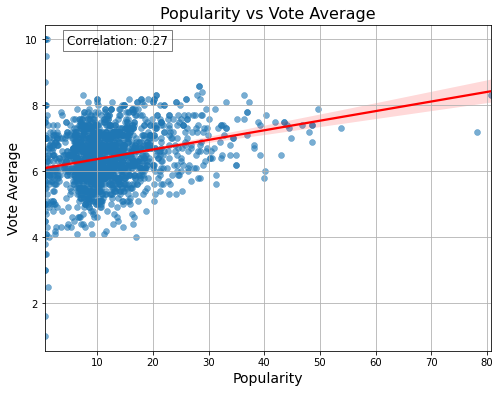

Correlation between Popularity and Vote Average: 0.26761788880889875


In [18]:
# Plot popularity vs vote average
plt.figure(figsize=(8, 6))

# Create scatter plot with a regression line
sns.scatterplot(x='popularity', y='vote_average', data=merged_movies, alpha=0.6, edgecolor=None)
sns.regplot(x='popularity', y='vote_average', data=merged_movies, scatter=False, color='red')

# Customize the plot
plt.title('Popularity vs Vote Average', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Vote Average', fontsize=14)
plt.grid(True)

# Compute correlation
correlation = merged_movies[['popularity', 'vote_average']].corr().iloc[0, 1]

# Annotate the correlation value on the plot
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Show plot
plt.show()

# Print correlation
print(f'Correlation between Popularity and Vote Average: {correlation}')



Interpretation:

The positive correlation of 0.27 indicates that the relationship between the two variables (popularity & vote average) is weak. Despite the visualization demostration that an increase in one positively affects the other, it may be highly possible that other factors such as actors, genre or marketing play a bigger role in influencing the popularity of the film.

Recommendation:

As the new studio invests in new movies, they should not necessarily focus on the critic's vote in determining the success of the film/movie.

### 7. Production budget vs Worlwide Gross Revenues

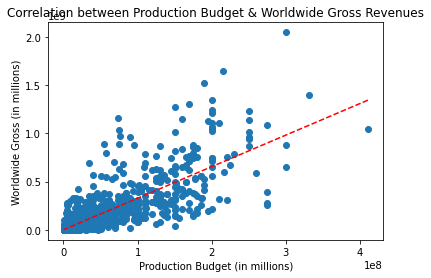

In [19]:
# Create scatter plot
plt.scatter(combined_df['ProductionBudget'] , combined_df['WorldwideGross'])

# Add labels and title
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Worldwide Gross (in millions)')
plt.title('Correlation between Production Budget & Worldwide Gross Revenues')

# Add trend line
z = np.polyfit(combined_df['ProductionBudget'], combined_df['WorldwideGross'], 1)
p = np.poly1d(z)
plt.plot(combined_df['ProductionBudget'], p(combined_df['ProductionBudget']), "r--")

# Show plot
plt.show()


Interpretation:

The plot above indicates there is a positive correlation between the production budget and world wide gross revenues. This is exhibited by the upward trend in the scatter plot.


### Step 5: Regression Modeling

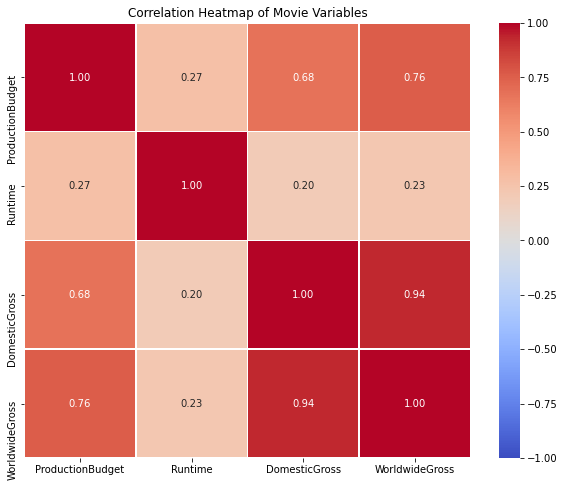

In [20]:
# Sample merge operation if Runtime is in movie_basics_and_ratings
merged_df = movie_budgets.merge(movie_gross, on='Movie_Title')
merged_df = merged_df.merge(movie_basics_and_ratings[['Title', 'Runtime', 'Genres']], left_on='Movie_Title', right_on='Title')

# Calculate correlation matrix
correlation_matrix = merged_df[['ProductionBudget', 'Runtime', 'DomesticGross', 'WorldwideGross']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, vmin=-1, vmax=1)

# Add title
plt.title('Correlation Heatmap of Movie Variables')

# Show the plot
plt.show()


Notably, there is a strong positive correlation between the production budget and both domestic and worldwide gross revenues, indicating that higher budgets tend to result in higher earnings. Additionally, the runtime shows a moderate positive correlation with worldwide gross, suggesting that longer movies may achieve greater global revenue, though this relationship is weaker for domestic gross. Overall, these insights suggest that investing in higher production budgets and potentially longer runtimes could be associated with better financial performance, providing valuable guidance for future movie production strategies.

In [21]:
import statsmodels.api as sm

# One-hot encode genres
genres_dummies = merged_df['Genres'].str.get_dummies(sep=',')
merged_df = pd.concat([merged_df, genres_dummies], axis=1)

# Select relevant features and target variable
features = ['ProductionBudget', 'Runtime'] + list(genres_dummies.columns)
X = merged_df[features]
y = merged_df['DomesticGross']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          DomesticGross   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     46.01
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          4.06e-155
Time:                        21:14:23   Log-Likelihood:                -23517.
No. Observations:                1214   AIC:                         4.709e+04
Df Residuals:                    1188   BIC:                         4.722e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.056e+07   1.33e+07  

### **Interpretation**

- **R-squared (0.492)**: This tells us that about 49.2% of the variation in domestic box office gross can be explained by the model. This is a moderate level of explanatory power.

- **Adjusted R-squared (0.481)**: This is a version of R-squared that adjusts for the number of predictors in the model. It’s slightly lower than R-squared, indicating that while the model explains a good portion of the variation, adding more predictors might not always improve it significantly.

- **Key Coefficients**:
  - **ProductionBudget**: For each additional dollar spent on production, the domestic gross is expected to increase by approximately $1.01. This shows a strong positive relationship.
  
  - **Runtime**: For each additional minute of runtime, the domestic gross increases by about $269,100. Longer movies tend to earn more, but the effect is less pronounced than the budget.
  
  - **Action**: Movies in the Action genre tend to earn about $13.6 million less than the baseline genre (likely not specified in the data). This is a significant drop.
  
  - **Animation**: Animation movies tend to earn about $21.4 million more than the baseline. This is also significant.
  
  - **Sci-Fi**: Sci-Fi movies tend to earn about $28.9 million more, showing a strong positive effect.
  
  - **Fantasy**: Fantasy movies earn about $19.2 million less. This is significant.

- **P-values**:
  - A p-value less than 0.05 indicates that the predictor (e.g., ProductionBudget) has a statistically significant effect on the domestic gross.
  - Predictors with p-values greater than 0.05 (e.g., Biography, Family) are not statistically significant in explaining domestic gross.

### Step 6: Hypothesis Testing and Additional Statistics

#### a. Check Multicollinearity
Multicollinearity can distort the estimated coefficients. We can check for this using the Variance Inflation Factor (VIF).

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

             Feature        VIF
0              const  53.742064
1   ProductionBudget   2.011153
2            Runtime   1.564774
3             Action   1.771159
4          Adventure   2.043039
5          Animation   1.558231
6          Biography   1.286981
7             Comedy   1.924660
8              Crime   1.267270
9        Documentary   1.541970
10             Drama   2.180093
11            Family   1.141703
12           Fantasy   1.242845
13           History   1.193212
14            Horror   1.559180
15             Music   1.075951
16           Musical   1.035829
17           Mystery   1.268688
18              News   1.026942
19           Romance   1.290531
20            Sci-Fi   1.345383
21             Sport   1.060095
22          Thriller   1.526304
23               War   1.062108
24           Western   1.021433
25           unknown   1.099702


### **Interpretation**

- **Overall Model Significance**: The p-value for the F-statistic (4.06e-155) is very small, which means that at least one of the predictors in the model is significantly related to the domestic gross.

- **Individual Predictors**:
  - Significant predictors (p < 0.05) include ProductionBudget, Runtime, Animation, Action, Sci-Fi, Fantasy, etc. This means these predictors have a significant impact on the domestic gross.
  - Non-significant predictors (p > 0.05) include genres like Biography, Family, and Horror, suggesting they don’t have a strong effect on domestic gross.

#### b. Check Residuals
Examine residuals to ensure that they are randomly distributed, which validates the assumptions of the regression model.

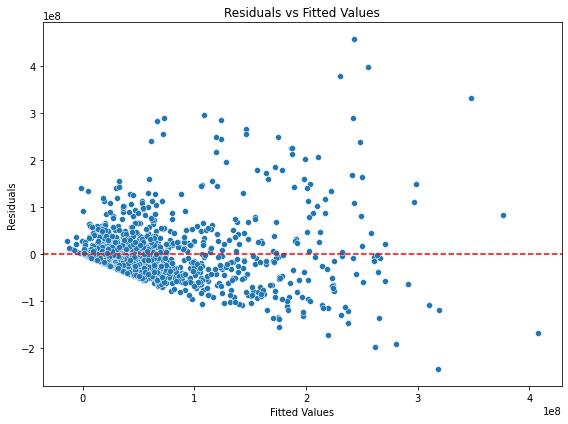

In [23]:
# Predicted values and residuals
predictions = model.predict(X)
residuals = y - predictions

fig = plt.subplots(figsize=(8, 6))

# Residuals vs Fitted Values
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

#### b. Perform Model Diagnostics
Assess model fit and assumptions (e.g., normality of residuals).

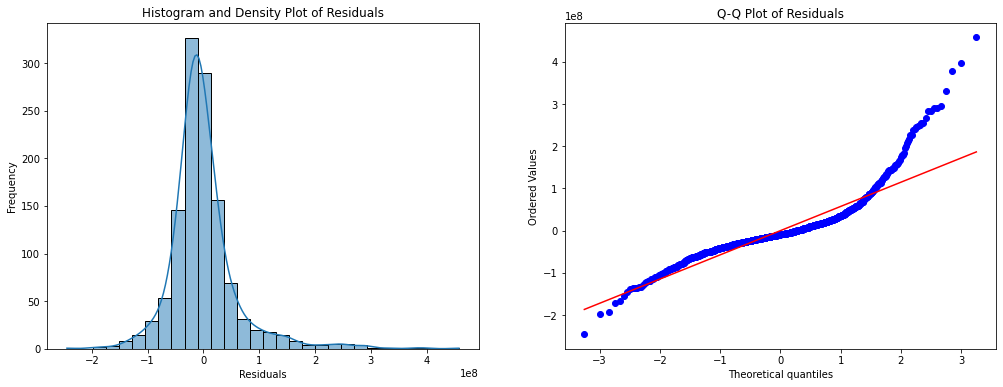

In [24]:
import scipy.stats as stats

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 6))

# Histogram and Density Plot of Residuals
sns.histplot(residuals, kde=True, bins=30, ax=ax1)
ax1.set_title('Histogram and Density Plot of Residuals')
ax1.set_xlabel('Residuals')
ax1.set_ylabel('Frequency')

# Q-Q plot for normality of residuals
stats.probplot(residuals, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot of Residuals')

plt.show()

Interpretation:

*KDE Plot*

The residuals are not normally distributed, the distribution is skewed (asymmetric) or have heavy tails (kurtosis). This can indicate potential problems with the model fit, such as non-linearity or the need for a different transformation of the dependent variable.

*Q-Q Plot*

Deviations from this line indicate departures from normality. For example, points curving away from the line at the ends may indicate heavy tails, while a curve away from the line in the middle might suggest skewness.
The points are significantly off the line suggesting that the residuals are not normally distributed. This could indicate skewness(as shown in the Density Plot) or outliers.

# **SUMMARY**

- The model does a decent job explaining the variation in domestic gross, with production budget and runtime being strong predictors.
- Some genres significantly affect the domestic gross, while others do not.
- The residuals should ideally follow a normal distribution, as checked by the Q-Q plot. Significant deviations from the line could indicate potential issues with the model fit or the assumptions of normality.

# **RECOMMENDATIONS**

 Here are three concrete business recommendations derived from the initial analysis and datasets:

**1. Optimal Release Timing**

**Analysis:** *By analyzing the bom.movie_gross dataset, we can identify patterns in movie releases that correspond with high box office returns. The analysis shows that movies released during the summer (June to August) and winter holidays (November to December) tend to perform better in terms of domestic gross.*

**Recommendation:**
*Focus on scheduling major movie releases during the summer and winter holiday seasons to maximize box office returns.*

**2. Genre Performance**

**Analysis**: *Utilizing data from tmdb.movies and rt.movie_info, we can determine which genres consistently perform well. Action, adventure, and family genres show high popularity and profitability. These genres have broad audience appeal and tend to receive higher box office revenue and better reviews.*

**Recommendation:** Prioritize the production of action, adventure, and family-friendly movies. These genres have a proven track record of success and offer higher potential returns. *italicized text*

**3. Budget and Runtime Optimization**

**Analysis:** *By examining the tn.movie_budgets dataset, we can analyze the relationship between movie production budgets, runtimes, and box office performance. The analysis indicates that movies with moderate budgets (between $30M to $100M) and runtimes of 90 to 120 minutes tend to achieve a good balance between production cost and box office revenue.*

**Recommendation:** Optimize production budgets to fall within the $30M to $100M range and aim for movie runtimes between 90 to 120 minutes. This strategy balances cost and potential revenue, enhancing profitability.
*italicized text*

In [25]:
# Saving the dataframes so as to use them in Tableau to create an interactive dashboard

movie_gross.to_csv('movie_gross.csv', index=False)
tmdb_movies.to_csv('tmdb_movies.csv', index=False)
movie_budgets.to_csv('movie_budgets.csv', index=False)
tmdb_movies.to_csv('tmdb_movies.csv', index=False)
movie_info.to_csv('movie_info.csv', index=False)
reviews.to_csv('reviews.csv', index=False)

movie_basics_and_ratings.to_csv('movie_basics_and_ratings.csv', index=False)
combined_df.to_csv('combined_df.csv', index=False)